In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
inputs = r"C:\Users\DAI.STUDENTSDC\Desktop\NLP_CV\dataset\CV\images"
outputs = r"C:\Users\DAI.STUDENTSDC\Desktop\NLP_CV\CV\outputs"

In [5]:
img = cv2.imread(os.path.join(inputs, 'sachin.jpg'))

In [94]:
lenna = cv2.imread(os.path.join(inputs, 'lenna.png'), 0 )

In [4]:
# defining the averaging kernel
# kernek = np.ones([5,5]) * .004
kernel = np.full((5,5), 1/25, dtype = 'float32')


In [5]:
help(cv2.filter2D)

Help on built-in function filter2D:

filter2D(...)
    filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst
    .   @brief Convolves an image with the kernel.
    .
    .   The function applies an arbitrary linear filter to an image. In-place operation is supported. When
    .   the aperture is partially outside the image, the function interpolates outlier pixel values
    .   according to the specified border mode.
    .
    .   The function does actually compute correlation, not the convolution:
    .
    .   \f[\texttt{dst} (x,y) =  \sum _{ \substack{0\leq x' < \texttt{kernel.cols}\\{0\leq y' < \texttt{kernel.rows}}}}  \texttt{kernel} (x',y')* \texttt{src} (x+x'- \texttt{anchor.x} ,y+y'- \texttt{anchor.y} )\f]
    .
    .   That is, the kernel is not mirrored around the anchor point. If you need a real convolution, flip
    .   the kernel using #flip and set the new anchor to `(kernel.cols - anchor.x - 1, kernel.rows -
    .   anchor.y - 1)`.
    .
    .   Th

-1: This value indicates the depth of the output image.

-1 means that the output image will have the same depth (data type) as the input image. For example, if the input image is of type uint8, the output will also be of type uint8.

In [7]:
smoothened_image = cv2.filter2D(img, -1, kernel)

In [8]:
cv2.imshow('Blurred image', smoothened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
kernel = np.full((7, 7), 1/49, dtype = 'float32')
smoothened_image = cv2.filter2D(img, -1, kernel)
cv2.imshow('Blurred image', smoothened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Gaussian kernel

In [20]:
kernel_size = 7
sigma = .35 * ((kernel_size - 1) * .5 - 1) + .9
kernel = cv2.getGaussianKernel(kernel_size, sigma)

In [22]:
kernel

array([[0.04414655],
       [0.11722289],
       [0.21061139],
       [0.25603834],
       [0.21061139],
       [0.11722289],
       [0.04414655]])

In [24]:
sigma

1.6

In [30]:
gauss_image = cv2.filter2D(img, -1, kernel)
cv2.imshow("Blurred Image", gauss_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
new_img = np.hstack([img, gauss_image])
cv2.imshow("Blurred Image", new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### median blur

In [43]:
gray = cv2.imread(os.path.join(inputs, 'sachin.jpg'), 0)

In [45]:
gray.shape

(1075, 850)

In [59]:
img_med = cv2.medianBlur(gray, 15) # 5 ---> kernel size

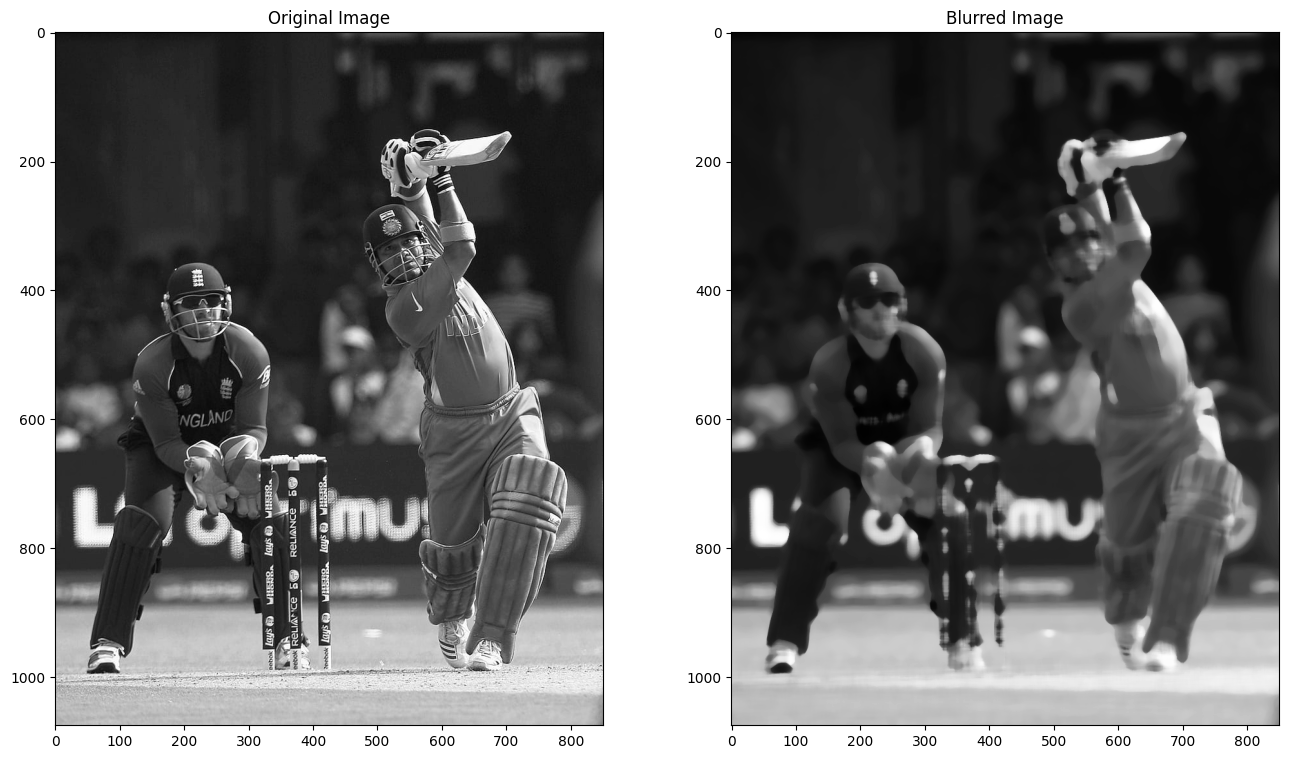

In [61]:
plt.figure(figsize = (16, 9))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(gray, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.title('Blurred Image')
plt.imshow(img_med, cmap = 'gray')


In [63]:
temp = img[500:700, 400:700]

In [67]:
selected_blur = img.copy()

In [69]:
selected_blur[500:700, 400:700] = cv2.medianBlur(temp, 15)

In [71]:
cv2.imshow("selected_blur", selected_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [73]:
temp = cv2.cvtColor(selected_blur, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'orignal image')

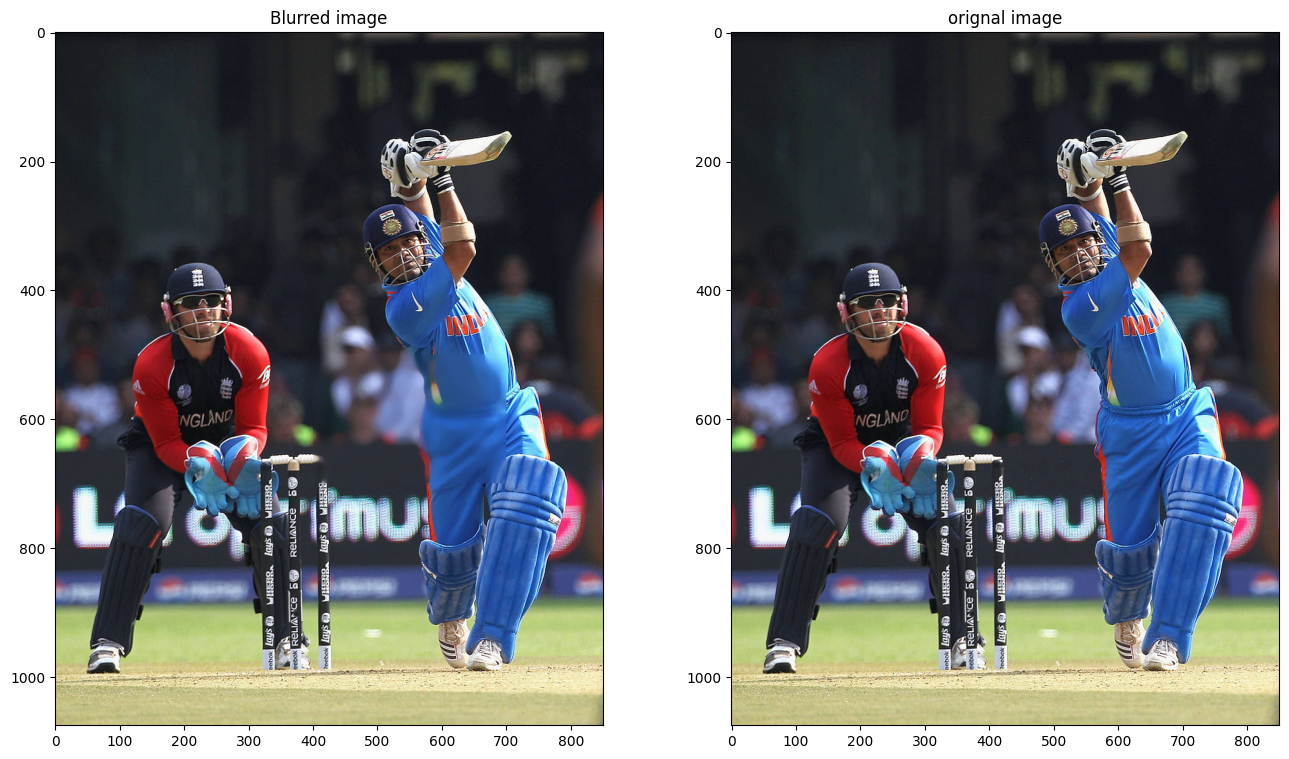

In [89]:
plt.figure(figsize = (16,9))
plt.subplot(1,2,1)
plt.imshow(temp)
plt.title("Blurred image")
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("orignal image")